# Bottle rocket problem

This follows from the Jupyter notebook from Monday's lecture (2024 November 18).

In [ ]:
import numpy as np

K = 0.98
rho = 1000  # density of water
p0 = 1.0e5  # atmospheric pressure / Pa
Vbottle = 0.002 # volume of bottle
p_0 = 2.0e5 + p0 # initial air pressure in rocket
V_0 = 0.5*Vbottle # initial air volume in rocket
#D = 0.025
D = 0.01
A = np.pi*D**2/4

mwater_old = 0.5*Vbottle*rho
V_old = Vbottle - mwater_old/rho
p_old = (V_0*p_0)/V_old
Deltap_old = p_old - p0
v_old = K * np.sqrt(2*Deltap_old/rho)   # speed of water exitting the rocket
dotm_old = rho*A*v_old
#print(dotm_old)
dt = 0.0001

for step in range(100):
  mwater = mwater_old - dotm_old*dt
  V = Vbottle - mwater/rho
  p = (V_0*p_0)/V
  Deltap = p - p0
  v = K * np.sqrt(2*Deltap/rho)   # speed of water exitting the rocket
  dotm = rho*A*v
  print(mwater)
  mwater_old = mwater
  V_old = V
  p_old = p
  Deltap_old = Deltap
  v_old = v
  dotm_old = dotm

print(mwater)

0.999846061959974
0.9996921416909286
0.999538239187394
0.9993843544439042
0.9992304874549958
0.9990766382152089
0.9989228067190866
0.9987689929611754
0.9986151969360245
0.9984614186381866
0.9983076580622174
0.9981539152026757
0.9980001900541235
0.997846482611126
0.9976927928682513
0.9975391208200708
0.997385466461159
0.9972318297860935
0.997078210789455
0.9969246094658274
0.9967710258097976
0.9966174598159556
0.9964639114788947
0.996310380793211
0.996156867753504
0.9960033723543761
0.9958498945904328
0.9956964344562829
0.995542991946538
0.9953895670558129
0.9952361597787257
0.9950827701098973
0.9949293980439518
0.9947760435755163
0.9946227066992211
0.9944693874096996
0.9943160857015879
0.9941628015695256
0.9940095350081554
0.9938562860121225
0.9937030545760759
0.993549840694667
0.9933966443625507
0.9932434655743848
0.9930903043248301
0.9929371606085506
0.9927840344202132
0.9926309257544879
0.9924778346060475
0.9923247609695685
0.9921717048397296
0.9920186662112132
0.9918656450787042
0.

14.78420936408743


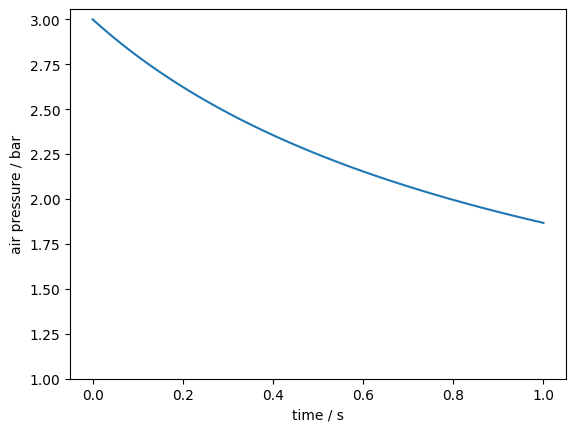

In [53]:
import numpy as np
import matplotlib.pyplot as plt

frac = 0.5
K = 0.98
rho = 1000  # density of water
p0 = 1.0e5  # atmospheric pressure / Pa
Vbottle = 0.002 # volume of bottle
p_0 = 2.0e5 + p0 # initial air pressure in rocket
V_0 = (1-frac)*Vbottle # initial air volume in rocket
D = 0.025
D = 7.0e-3
A = np.pi*D**2/4

t_old = 0.0
mwater_old = frac*Vbottle*rho
V_old = Vbottle - mwater_old/rho
p_old = (V_0*p_0)/V_old
Deltap_old = p_old - p0
v_old = K * np.sqrt(2*Deltap_old/rho)   # speed of water exitting the rocket
dotm_old = rho*A*v_old
Fthrust_old = v_old*dotm_old
print(Fthrust_old)
dt = 0.01

mwater_list = [mwater_old]
t_list = [t_old]
Fthrust_list = [Fthrust_old]
p_list = [p_old*1.0e-5]
for step in range(100):
  t = t_old + dt
  mwater = mwater_old - dotm_old*dt
  if (mwater < 0.0):
    break
  V = Vbottle - mwater/rho
  p = (V_0*p_0)/V
  Deltap = p - p0
  v = K * np.sqrt(2*Deltap/rho)   # speed of water exitting the rocket
  dotm = rho*A*v
  Fthrust = v*dotm
  Fthrust_list.append(Fthrust)
  p_list.append(p*1.0e-5)

  t_list.append(t)
  mwater_list.append(mwater)

  t_old = t
  mwater_old = mwater
  V_old = V
  p_old = p
  Deltap_old = Deltap
  v_old = v
  dotm_old = dotm

#plt.plot(t_list, mwater_list)
#plt.ylabel('mass of water / kg')

#plt.plot(t_list, Fthrust_list)
#plt.ylabel('thrust / N')

plt.plot(t_list, p_list)
plt.ylabel('air pressure / bar')
plt.ylim(bottom=1)

plt.xlabel('time / s')
#plt.title('Mass of Water in Rocket')
plt.show()

## Tutorial 9

̄Momentum balance equations:
̄$$
\begin{align*}
m\frac{dv_x}{dt}
&= - F_{\rm drag} \frac{v_x}{v}
\\
m\frac{dv_y}{dt}
&= - F_{\rm drag} \frac{v_y}{v}
- g
\end{align*}
$$
where $v=\sqrt{v_x^2+v_y^2}$ is the projectile speed, $g$ is the acceleration due to gravity, and $F_{\rm drag}$ is the drag force due to air resistance:
$$
F_{\rm drag} = \frac{1}{2} C_d A \rho_{\rm air} v^2
$$
where $C_d$ is the drag coefficient, $A$ is the cross-sectional area of the projectile, and $\rho_{\rm air}$ is the density of air.

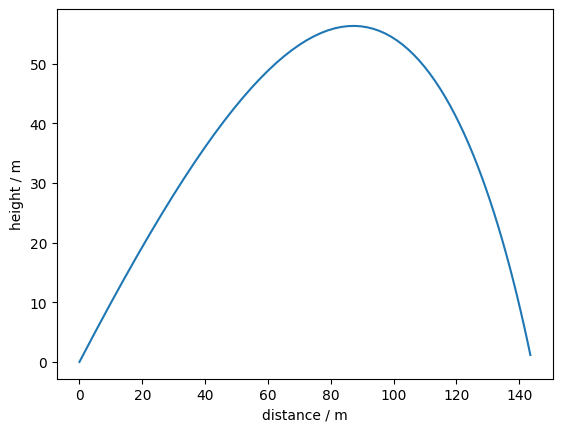

In [54]:
import numpy as np

g = 9.81            # acceleration due to gravity
Cd = 0.44           # drag coefficient for a sphere
diameter = 0.04267  # diameter of projectile / m
m = 0.0459          # projectile mass
Area = np.pi * diameter**2 / 4  # cross-sectional area of projectile
density = 1.2       # air density / kg m^{-3}
v0 = 70             # initial projectile speed
angle = 45 * np.pi/180

dt = 0.1   # time step / s

x_old = 0
y_old = 0
vx_old = v0*np.cos(angle)
vy_old = v0*np.sin(angle)
t_old = 0

t_list = [t_old]
x_list = [x_old]
y_list = [y_old]
vx_list = [vx_old]
vy_list = [vy_old]
for step in range(1000):
  t = t_old + dt
  x = x_old + vx_old*dt
  y = y_old + vy_old*dt
  if (y<0):
    break
  x_list.append(x)
  y_list.append(y)
  v = np.sqrt(vx_old**2+vy_old**2)
  Fdrag = 0.5*density*Cd*Area*v**2
  dvx_dt = - Fdrag / m * vx_old/v
  dvy_dt = - Fdrag / m * vy_old/v - g
  vx = vx_old + dvx_dt*dt
  vy = vy_old + dvy_dt * dt
#  print(t, vx, vy)
  t_list.append(t)
  vx_list.append(vx)
  vy_list.append(vy)

  t_old = t
  x_old = x
  y_old = y
  vx_old = vx
  vy_old = vy



import matplotlib.pyplot as plt
plt.plot(x_list, y_list)
plt.ylabel('height / m')
plt.xlabel('distance / m')
plt.show()

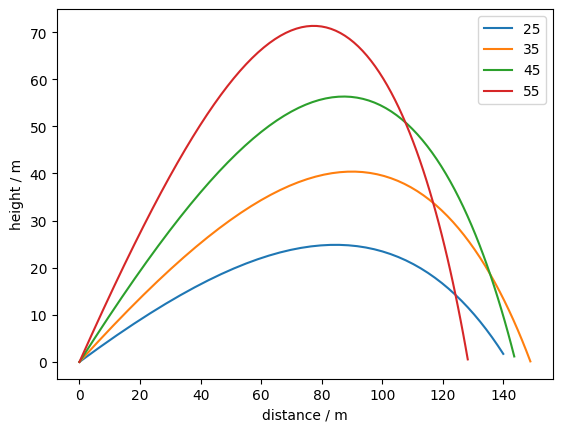

In [57]:
import numpy as np

g = 9.81
Cd = 0.44
diameter = 0.04267
m = 0.0459
Area = np.pi * diameter**2 / 4
density = 1.2
v0 = 70

def get_trajectory(degrees):
  angle = degrees * np.pi/180

  dt = 0.1

  x_old = 0
  y_old = 0
  vx_old = v0*np.cos(angle)
  vy_old = v0*np.sin(angle)
  t_old = 0

  t_list = [t_old]
  x_list = [x_old]
  y_list = [y_old]
  vx_list = [vx_old]
  vy_list = [vy_old]
  for step in range(1000):
    t = t_old + dt
    x = x_old + vx_old*dt
    y = y_old + vy_old*dt
    if (y<0):
      break
    v = np.sqrt(vx_old**2+vy_old**2)
    Fdrag = 0.5*density*Cd*Area*v**2
    dvx_dt = - Fdrag / m * vx_old/v
    dvy_dt = - Fdrag / m * vy_old/v - g
    vx = vx_old + dvx_dt*dt
    vy = vy_old + dvy_dt * dt

    t_list.append(t)
    x_list.append(x)
    y_list.append(y)
    vx_list.append(vx)
    vy_list.append(vy)

    t_old = t
    x_old = x
    y_old = y
    vx_old = vx
    vy_old = vy

  plt.plot(x_list, y_list, label=str(degrees))

get_trajectory(25)
get_trajectory(35)
get_trajectory(45)
get_trajectory(55)


plt.legend()
plt.ylabel('height / m')
plt.xlabel('distance / m')
plt.show()
